# Step-1: Business Problem Understanding
- This dataset contains detailed information about customer demographics, spending behavior, geographic location, category preferences, and risk indicators such as churn and fraudulent activity.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Step-2: Extract
- Extact the raw data
- Data understanding
- Data Exploration

In [2]:
df = pd.read_csv("customer_analytics_dataset.csv")
df

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST_8533,49,Female,UK,132.16,9,306,0,Electronics,20.9,2020-10-17,13,0.33
4996,CUST_5616,23,Female,UK,47.81,10,296,0,Home,NaN,2024-10-21,66,0.22
4997,CUST_2140,79,Male,Japan,224.97,16,84,0,Beauty,92.9,2022-11-13,56,0.23
4998,CUST_6730,62,Male,USA,220.33,8,254,0,Fashion,83.8,2023-05-29,47,0.09


In [3]:
df.shape

(5000, 13)

In [4]:
df.columns.tolist()

['customer_id',
 'age',
 'gender',
 'country',
 'avg_order_value',
 'total_orders',
 'last_purchase',
 'is_fraudulent',
 'preferred_category',
 'email_open_rate',
 'customer_since',
 'loyalty_score',
 'churn_risk']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


In [6]:
df['customer_id'].nunique()

3809

In [7]:
df["age"].unique()

array([30, 53, 73, 29, 54, 27, 77, 26, 69, 24, 19, 71, 40, 56, 57, 38, 46,
       31, 43, 68, 22, 72, 48, 42, 67, 37, 61, 34, 62, 75, 45, 59, 23, 20,
       52, 35, 28, 36, 39, 76, 79, 64, 33, 41, 58, 21, 32, 66, 55, 47, 25,
       44, 51, 63, 78, 65, 49, 18, 70, 50, 74, 60], dtype=int64)

In [8]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [9]:
df["gender"].value_counts()

gender
Male      2278
Female    2242
Other      480
Name: count, dtype: int64

In [10]:
df["country"].unique()

array(['Brazil', 'USA', 'Australia', 'Japan', 'Canada', 'France', 'India',
       'China', 'Germany', 'UK'], dtype=object)

In [11]:
df["country"].value_counts()

country
Australia    518
USA          517
India        511
Germany      509
Brazil       504
France       500
China        497
Canada       490
UK           485
Japan        469
Name: count, dtype: int64

In [12]:
df["avg_order_value"].nunique()

4221

In [13]:
df["total_orders"].unique()

array([ 8, 10,  6,  9, 16, 11,  7,  4, 14, 12, 15,  1, 13,  5, 19, 17, 18,
       21,  2, 20,  3, 23, 22,  0], dtype=int64)

In [14]:
df["total_orders"].value_counts()

total_orders
9     667
10    621
8     596
11    557
12    450
7     419
13    385
6     305
14    237
15    180
5     174
16    112
4      98
17     80
3      39
18     31
19     20
20      9
2       7
1       4
21      4
23      2
22      2
0       1
Name: count, dtype: int64

In [15]:
df["last_purchase"].unique()

array([176,  88, 203, 346, 342, 210, 212,  20,  87,  12, 119, 177, 128,
        50,  41, 317,  94, 241, 355,  60, 348, 227, 276,  17, 243, 310,
       323,  46, 309, 200, 252, 191,  48,  93, 236, 221, 166, 253,  56,
         5, 237, 220, 223,  77,  19, 305, 264, 141, 303,  79, 209, 255,
       311,  39, 352, 201,  85,  42, 235,  69, 130, 131, 247, 154, 229,
       228,  26, 360, 174, 315, 291, 169, 262, 115, 127,   4, 325, 185,
       171, 198, 230, 287, 334, 114, 332, 329, 312,  10, 103, 304,  37,
       271, 343, 250, 333, 122, 155, 216, 193, 300, 160, 125, 173,  34,
       238,  40, 182, 260,  33, 186, 306, 136, 142, 108, 156, 254, 180,
       340, 218,  27, 150, 358,  99,   2,  32,  68,  89,  16, 336, 322,
       263,  59, 183, 356, 364, 240, 231,  51, 118, 214, 321, 148, 175,
       268, 319, 202,  36,  53, 283,  44, 320, 140,  58, 239, 109, 298,
       164, 258,  75,   6, 275,  78,  64,  97,  73, 292, 133, 261, 101,
       205, 248,   9,  98, 206, 341, 225, 123, 316, 302,  76,  8

In [16]:
df["is_fraudulent"].unique()

array([1, 0], dtype=int64)

In [17]:
df["is_fraudulent"].value_counts()

is_fraudulent
0    4871
1     129
Name: count, dtype: int64

In [18]:
df['preferred_category'].unique()

array(['Beauty', 'Electronics', 'Sports', 'Fashion', 'Home'], dtype=object)

In [19]:
df['preferred_category'].value_counts()

preferred_category
Beauty         1035
Electronics    1021
Home           1004
Fashion         975
Sports          965
Name: count, dtype: int64

In [20]:
df['email_open_rate'].nunique()

989

In [21]:
df['customer_since'].unique()

array(['2024-06-05', '2024-02-19', '2024-04-16', ..., '2022-05-08',
       '2022-06-21', '2021-09-02'], dtype=object)

In [22]:
df['loyalty_score'].unique()

array([50, 37, 65, 93, 79, 44, 60, 29, 85, 63, 76, 26, 45, 95, 35, 78,  7,
       67, 53, 41,  4,  2, 33, 13, 39, 91, 49,  3, 17, 25, 94, 14,  5, 71,
       83, 51, 87, 61, 31, 15, 40, 20, 34, 32, 22, 62, 11, 38, 73, 48, 24,
       36, 43, 57, 99, 84, 46, 70, 19, 59, 81, 96, 28, 58, 42, 89, 77, 18,
        8,  9, 21, 92, 69, 66, 47, 98, 72, 80, 86, 56, 55, 90, 23, 16, 52,
       54,  1, 27, 64, 88, 74, 82,  6, 12, 97, 30, 68, 10, 75],
      dtype=int64)

In [23]:
df['churn_risk'].unique()

array([0.2 , 0.34, 0.05, 0.19, 0.15, 0.21, 0.39, 0.24, 0.37, 0.52, 0.11,
       0.12, 0.63, 0.61, 0.23, 0.27, 0.13, 0.33, 0.31, 0.1 , 0.08, 0.38,
       0.25, 0.43, 0.44, 0.41, 0.22, 0.28, 0.09, 0.14, 0.06, 0.3 , 0.36,
       0.4 , 0.35, 0.17, 0.07, 0.26, 0.59, 0.45, 0.46, 0.04, 0.29, 0.64,
       0.47, 0.03, 0.53, 0.56, 0.6 , 0.18, 0.32, 0.16, 0.01, 0.55, 0.74,
       0.51, 0.49, 0.48, 0.42, 0.54, 0.5 , 0.7 , 0.58, 0.75, 0.02, 0.66,
       0.71, 0.73, 0.72, 0.62, 0.88, 0.57, 0.65, 0.77, 0.67, 0.79, 0.76,
       0.8 , 0.68, 0.81, 0.83, 0.78, 0.  , 0.69, 0.82, 0.9 , 0.84, 0.85])

**Create new column as per requirement**

In [24]:
df['customer_since'] = pd.to_datetime(df['customer_since'])
today = pd.to_datetime('today')
df['tenure_days'] = (today - df['customer_since']).dt.days
df['customer_since_month'] = df['tenure_days']//30

df['last_purchase_month'] = df['last_purchase']//30

In [26]:
df

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,tenure_days,customer_since_month,last_purchase_month
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20,413,13,5
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34,520,17,2
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05,463,15,6
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19,1841,61,11
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15,105,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST_8533,49,Female,UK,132.16,9,306,0,Electronics,20.9,2020-10-17,13,0.33,1740,58,10
4996,CUST_5616,23,Female,UK,47.81,10,296,0,Home,NaN,2024-10-21,66,0.22,275,9,9
4997,CUST_2140,79,Male,Japan,224.97,16,84,0,Beauty,92.9,2022-11-13,56,0.23,983,32,2
4998,CUST_6730,62,Male,USA,220.33,8,254,0,Fashion,83.8,2023-05-29,47,0.09,786,26,8


In [27]:
continous = ['age','avg_order_value','last_purchase','email_open_rate','loyalty_score','churn_risk','customer_since_month']
discrete_categorical = ['gender','country','preferred_category']
discrete_count = ['total_orders','is_fraudulent']

**Exploratory Data Analysis**

In [28]:
df[continous].describe()

,age,avg_order_value,last_purchase,email_open_rate,loyalty_score,churn_risk,customer_since_month
count,5000.000000,4750.000000,5000.000000,4750.000000,5000.000000,5000.000000,5000.000000
mean,48.163200,108.442857,180.073200,50.714842,50.039400,0.284484,30.606000
std,17.880797,69.265559,104.926518,29.098706,28.832151,0.159690,17.659217
min,18.000000,10.660000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,57.805000,89.000000,25.225000,25.000000,0.160000,15.000000
50%,48.000000,93.190000,178.000000,50.950000,50.000000,0.260000,30.000000
75%,64.000000,142.197500,270.000000,76.800000,75.000000,0.390000,46.000000
max,79.000000,555.460000,364.000000,100.000000,99.000000,0.900000,61.000000


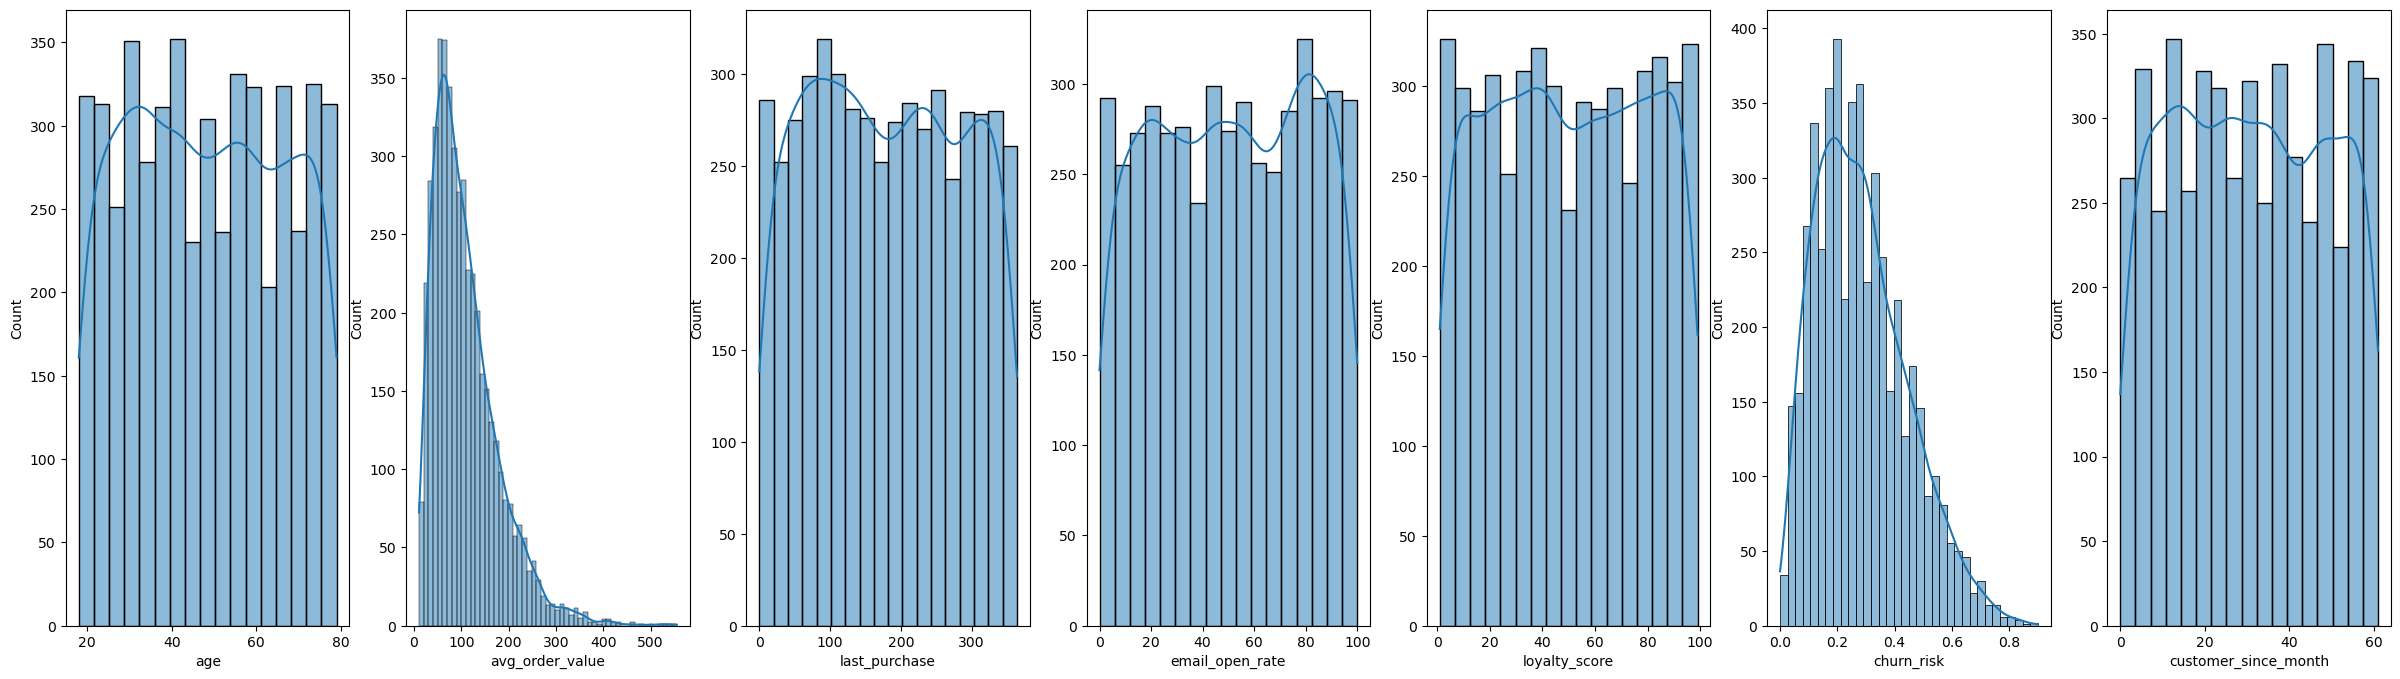

In [29]:
plt.figure(figsize = (30,8))

plt.subplot(1,7,1)
sns.histplot(df['age'],kde = True)

plt.subplot(1,7,2)
sns.histplot(df['avg_order_value'],kde = True)

plt.subplot(1,7,3)
sns.histplot(df['last_purchase'],kde = True)

plt.subplot(1,7,4)
sns.histplot(df['email_open_rate'],kde = True)

plt.subplot(1,7,5)
sns.histplot(df['loyalty_score'],kde = True)

plt.subplot(1,7,6)
sns.histplot(df['churn_risk'],kde = True)

plt.subplot(1,7,7)
sns.histplot(df['customer_since_month'],kde = True)

plt.show()

In [30]:
df[continous].corr()

,age,avg_order_value,last_purchase,email_open_rate,loyalty_score,churn_risk,customer_since_month
age,1.000000,0.001551,-0.001528,-0.010422,0.010880,0.007441,-0.011901
avg_order_value,0.001551,1.000000,0.022108,-0.021765,-0.006799,0.002397,0.010755
last_purchase,-0.001528,0.022108,1.000000,-0.006191,0.015608,0.007632,-0.003347
email_open_rate,-0.010422,-0.021765,-0.006191,1.000000,-0.004900,0.027624,0.005328
loyalty_score,0.010880,-0.006799,0.015608,-0.004900,1.000000,0.002135,-0.005646
churn_risk,0.007441,0.002397,0.007632,0.027624,0.002135,1.000000,0.002924
customer_since_month,-0.011901,0.010755,-0.003347,0.005328,-0.005646,0.002924,1.000000


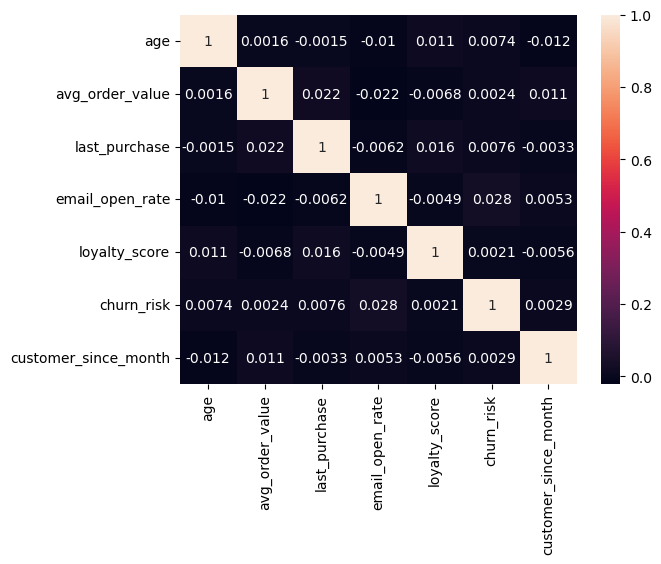

In [31]:
sns.heatmap(df[continous].corr(),annot = True)
plt.show()

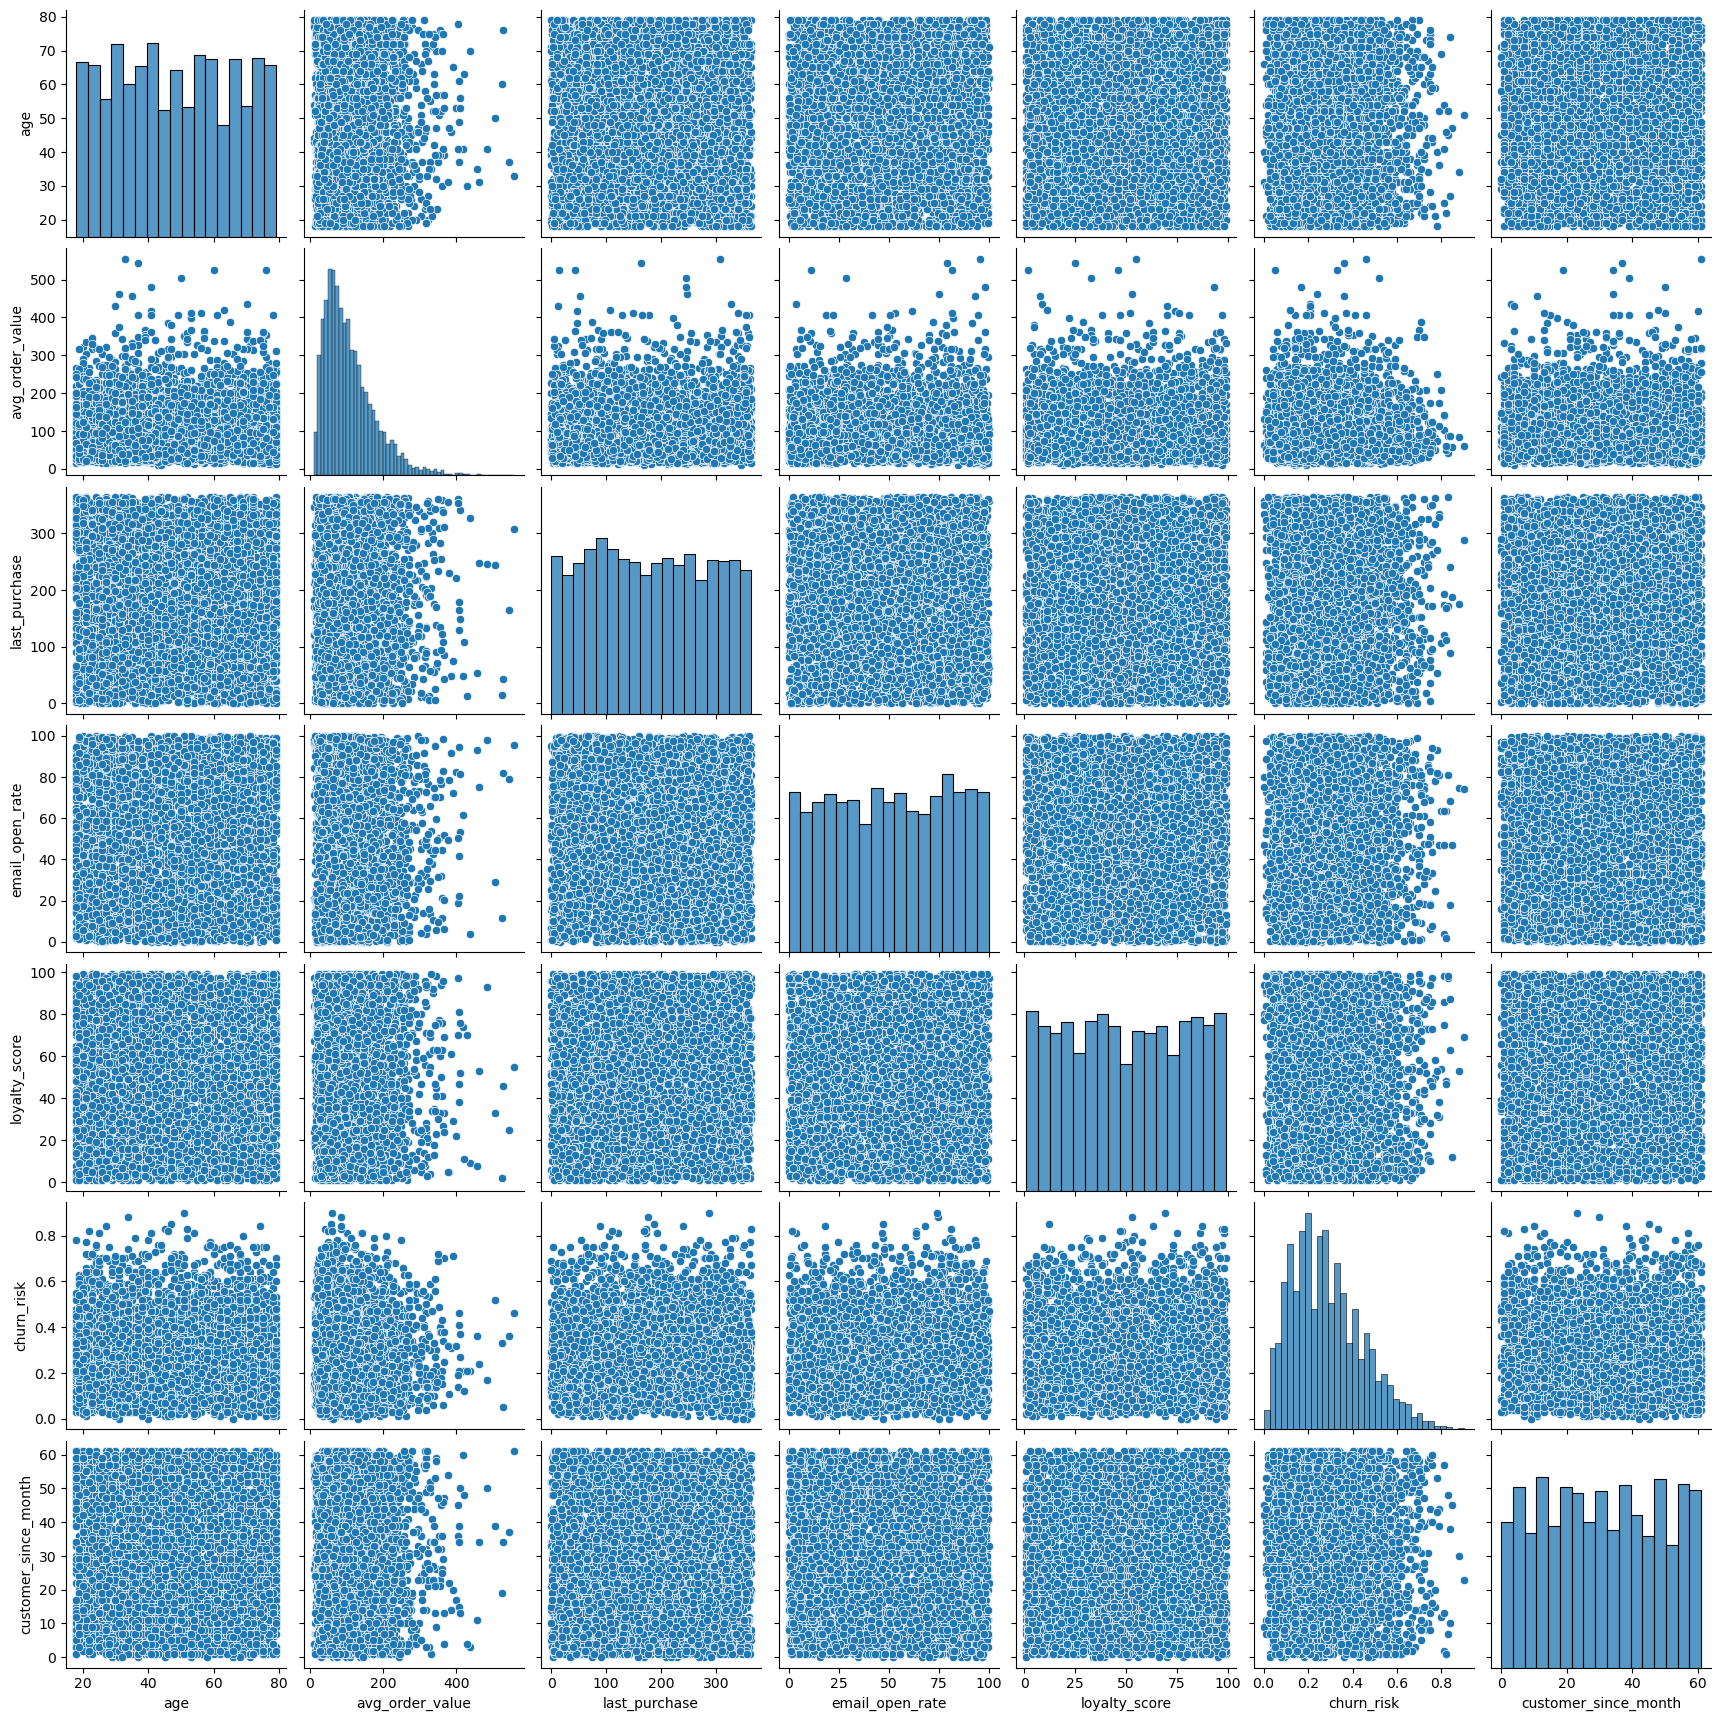

In [32]:
sns.pairplot(df[continous])
plt.show()

In [33]:
df[discrete_categorical].describe()

,gender,country,preferred_category
count,5000,5000,5000
unique,3,10,5
top,Male,Australia,Beauty
freq,2278,518,1035


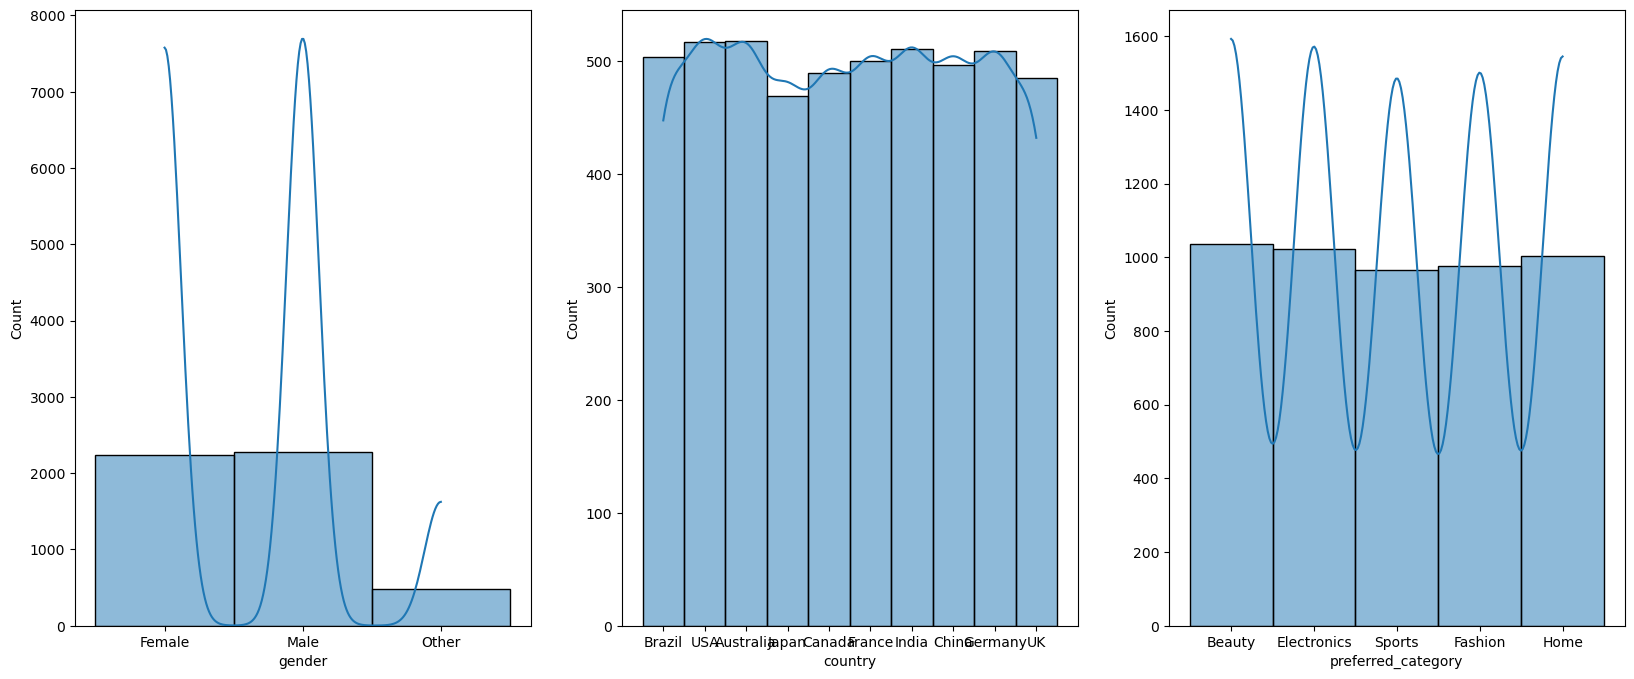

In [34]:
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.histplot(df['gender'],kde = True)

plt.subplot(1,3,2)
sns.histplot(df['country'],kde = True)

plt.subplot(1,3,3)
sns.histplot(df['preferred_category'],kde = True)

plt.show()

**Check outliers**

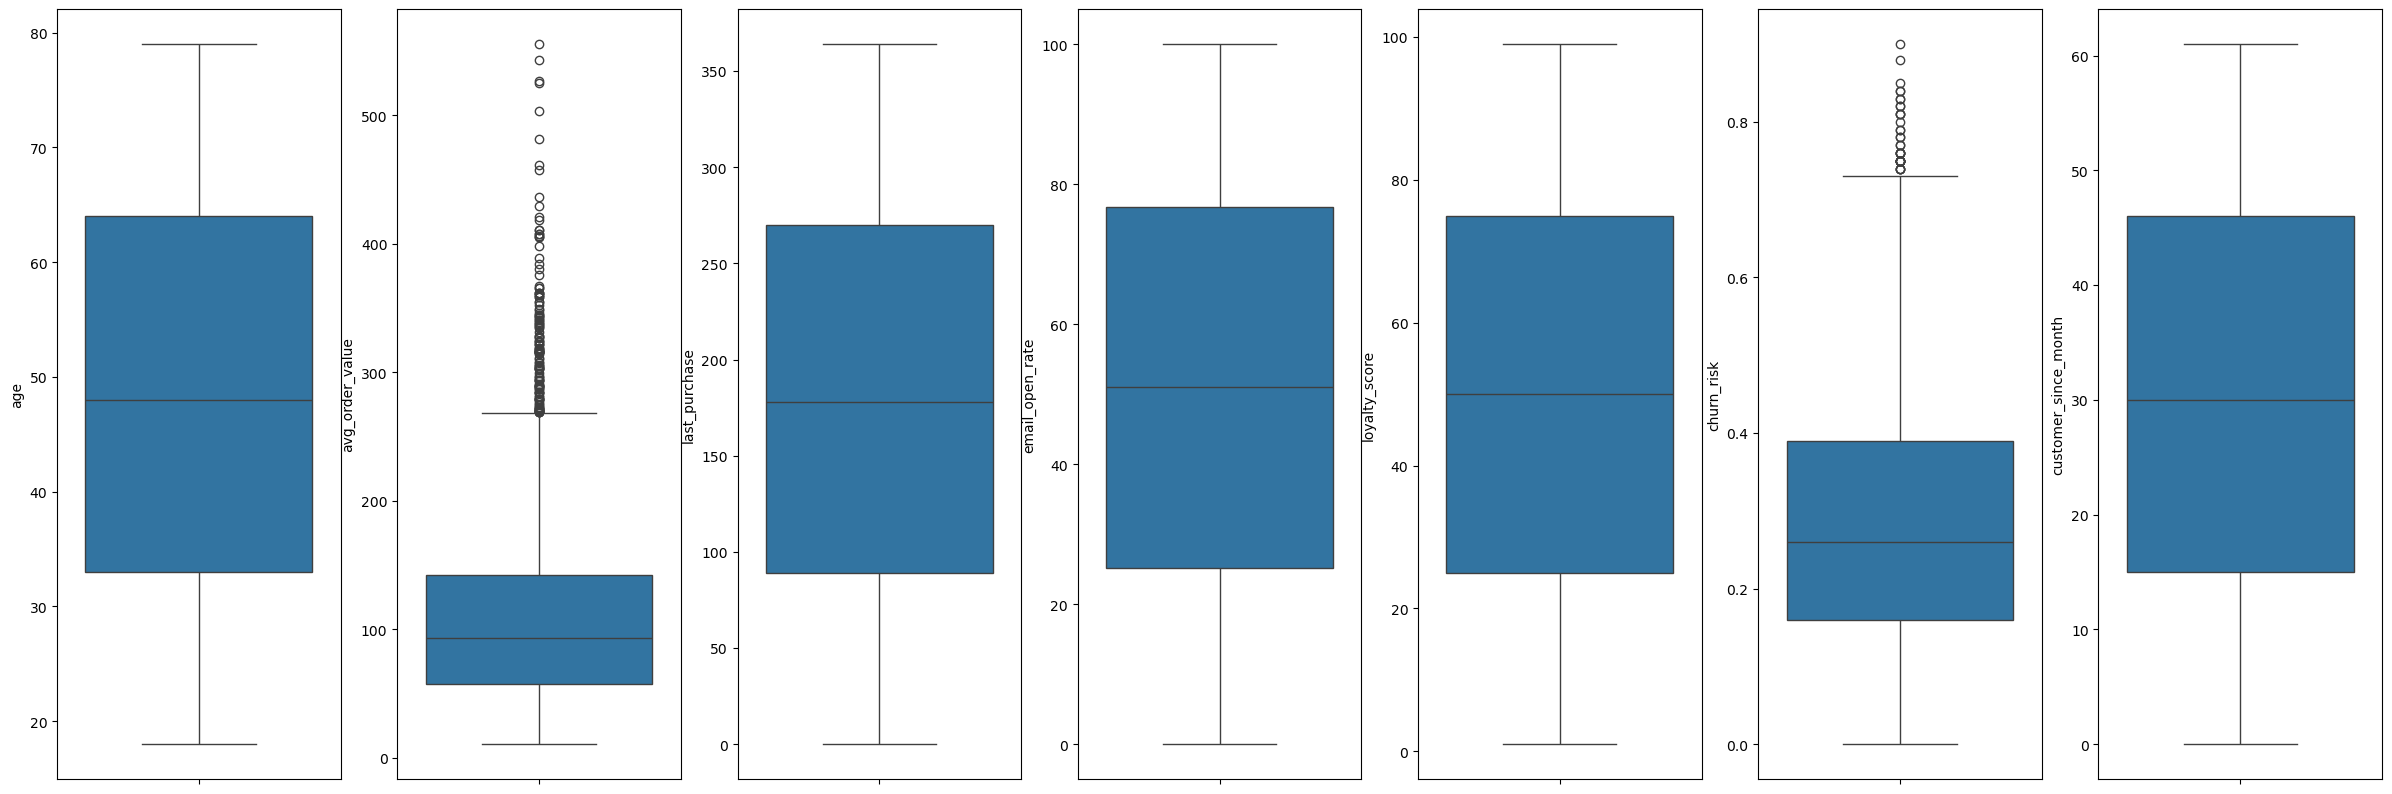

In [35]:
plt.figure(figsize=(30,10))
plt.subplot(1,7,1)
sns.boxplot(df["age"])

plt.subplot(1,7,2)
sns.boxplot(df["avg_order_value"])

plt.subplot(1,7,3)
sns.boxplot(df["last_purchase"])

plt.subplot(1,7,4)
sns.boxplot(df["email_open_rate"])

plt.subplot(1,7,5)
sns.boxplot(df["loyalty_score"])

plt.subplot(1,7,6)
sns.boxplot(df["churn_risk"])

plt.subplot(1,7,7)
sns.boxplot(df["customer_since_month"])

plt.show()

In [36]:
df[continous].skew()

age                     0.042378
avg_order_value         1.449520
last_purchase           0.037671
email_open_rate        -0.035775
loyalty_score          -0.001259
churn_risk              0.653804
customer_since_month    0.030355
dtype: float64

In [37]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
country                   0
avg_order_value         250
total_orders              0
last_purchase             0
is_fraudulent             0
preferred_category        0
email_open_rate         250
customer_since            0
loyalty_score             0
churn_risk                0
tenure_days               0
customer_since_month      0
last_purchase_month       0
dtype: int64

In [38]:
df.duplicated().sum()

0

# Step-3: Data Preparation

**Data Cleaning**

In [39]:
#There is no wrong data

In [40]:
#There is no wrong datatype

In [41]:
#Treat the missing values
df["avg_order_value"].fillna(df['avg_order_value'].median(),inplace = True)

In [45]:
#There is no duplicate

**Feature selection**

In [46]:
df.drop(columns = ['customer_id','last_purchase','email_open_rate','customer_since','tenure_days'],inplace = True)

**Data Wrangling**

**Feature Transformation**

In [47]:
from scipy.stats import boxcox
df['avg_order_value'],params = boxcox(df['avg_order_value'])
df['avg_order_value'].skew()

-0.006915749529673294

**Feature Encoding**

In [48]:
df= pd.get_dummies(df,columns = discrete_categorical,dtype = int,drop_first = True)

**Feature Scaling**

In [50]:
feature = ['age','avg_order_value','loyalty_score','churn_risk','customer_since_month','last_purchase_month']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[feature]= sc.fit_transform(df[feature])

In [52]:
df.to_excel("cleaned_CB.xlsx",index = False)